In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [36]:
datos_telecom = pd.read_json('TelecomX_Data.json')

In [37]:
datos_telecom.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [38]:
print(datos_telecom['Churn'].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [39]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [40]:
datos_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [41]:
datos_cliente = pd.json_normalize(datos_telecom['customer'])

In [42]:
Telefonos = pd.json_normalize(datos_telecom['phone'])

In [43]:
Datos_internet = pd.json_normalize(datos_telecom['internet'])

In [44]:
Cuenta = pd.json_normalize(datos_telecom['account'])

In [45]:
columnas = list(datos_telecom.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [46]:
datos_telecom.dropna(inplace=True)

In [47]:
df_nuevo = pd.concat([datos_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                        datos_cliente, Telefonos, Datos_internet, Cuenta], axis=1)

In [48]:
df_nuevo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [49]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [50]:
df_nuevo['Churn'] = df_nuevo['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [51]:
df_nuevo['Churn'].head()

,Churn
0,0
1,0
2,1
3,1
4,1


In [52]:

# Los errores 'coerce' convertirán los valores no numéricos (NaN)
df_nuevo['Charges.Total'] = pd.to_numeric(df_nuevo['Charges.Total'], errors='coerce')

In [53]:
# Verifico si hay NaNs generados.
df_nuevo['Charges.Total'].isnull().sum()

np.int64(11)

In [54]:
# Elimino filas con NaN
df_nuevo.dropna(subset=['Charges.Total'], inplace=True)


#Este codigo no funciono, todavia no encuentro el error
#if df_nuevo['Charges.Total'].isnull().any():
 #   median_total_charges = df_nuevo['Charges.Total'].median()
  #  df_nuevo['Charges.Total'].fillna(median_total_charges, inplace=True)
   # print(f"\nValores NaN en 'TotalCharges' después de la imputación: {df_nuevo['Charges.Total'].isnull().sum()}")

In [55]:
df_nuevo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   int64  
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

In [56]:
categori_cols = df_nuevo.select_dtypes(include='object').columns.tolist()
if 'customerID' in categori_cols:
    categori_cols.remove('customerID')
df_procesado = pd.get_dummies(df_nuevo, columns=categori_cols, drop_first=True)

In [57]:
df_procesado.head()


,customerID,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,0,9,65.6,593.30,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0003-MKNFE,0,0,9,59.9,542.40,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,1,0,4,73.9,280.85,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,0011-IGKFF,1,1,13,98.0,1237.85,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,0013-EXCHZ,1,1,3,83.9,267.40,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [58]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7256 non-null   object 
 1   Churn                                  7256 non-null   int64  
 2   SeniorCitizen                          7256 non-null   int64  
 3   tenure                                 7256 non-null   int64  
 4   Charges.Monthly                        7256 non-null   float64
 5   Charges.Total                          7256 non-null   float64
 6   gender_Male                            7256 non-null   bool   
 7   Partner_Yes                            7256 non-null   bool   
 8   Dependents_Yes                         7256 non-null   bool   
 9   PhoneService_Yes                       7256 non-null   bool   
 10  MultipleLines_No phone service         7256 non-null   bool   
 11  MultipleL

In [59]:
print("\nDescripción estadística del DataFrame procesado:")
print(df_procesado.describe())





Descripción estadística del DataFrame procesado:
             Churn  SeniorCitizen       tenure  Charges.Monthly  Charges.Total
count  7256.000000      7256.0000  7256.000000      7256.000000    7256.000000
mean      0.257580         0.1629    32.395535        64.755423    2280.634213
std       0.437332         0.3693    24.558067        30.125739    2268.632997
min       0.000000         0.0000     1.000000        18.250000      18.800000
25%       0.000000         0.0000     9.000000        35.450000     400.225000
50%       0.000000         0.0000    29.000000        70.300000    1391.000000
75%       1.000000         0.0000    55.000000        89.900000    3785.300000
max       1.000000         1.0000    72.000000       118.750000    8684.800000


In [60]:

churn_promedio = df_procesado['Churn'].mean()
print(f"prmedio de Fuga General: {churn_promedio:.2%}")


prmedio de Fuga General: 25.76%


In [61]:
if 'Contract' in df_nuevo.columns:
    churn_by_contract = df_nuevo.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
    print(churn_by_contract)
else:
    print("La columna 'Contract' original no está disponible para groupby directo, considera las columnas one-hot encoded.")

    if 'Contract_One year' in df_procesado.columns and 'Contract_Two year' in df_procesado.columns:
         print(f"Churn para Contrato 'One year': {df_procesado[df_procesado['Contract_One year'] == 1]['Churn'].mean():.2%}")
         print(f"Churn para Contrato 'Two year': {df_procesado[df_procesado['Contract_Two year'] == 1]['Churn'].mean():.2%}")
         print(f"Churn para Contrato 'Month-to-month': {df_procesado[(df_procesado['Contract_One year'] == 0) & (df_procesado['Contract_Two year'] == 0)]['Churn'].mean():.2%}")


Contract
Month-to-month    0.413233
One year          0.109354
Two year          0.027698
Name: Churn, dtype: float64


In [62]:
#fuga por Servicio de Internet
if 'InternetService' in df_nuevo.columns:
    print("\nTasa de Fuga por Servicio de Internet:")
    churn_por_internet = df_nuevo.groupby('InternetService')['Churn'].mean().sort_values(ascending=False)
    print(churn_por_internet)
else:
    print("La columna 'InternetService' original no está disponible para groupby directo.")



Tasa de Fuga por Servicio de Internet:
InternetService
Fiber optic    0.405566
DSL            0.184857
No             0.071746
Name: Churn, dtype: float64


In [63]:

print("\nMatriz de Correlación :")

matriz_de_correlación = df_procesado.drop('customerID', axis=1).corr()

print(matriz_de_correlación['Churn'].sort_values(ascending=False).head(10))



Matriz de Correlación :
Churn                             1.000000
InternetService_Fiber optic       0.300416
PaymentMethod_Electronic check    0.294181
Charges.Monthly                   0.189393
PaperlessBilling_Yes              0.186309
SeniorCitizen                     0.146400
StreamingTV_Yes                   0.062456
StreamingMovies_Yes               0.060092
MultipleLines_Yes                 0.039277
PhoneService_Yes                  0.012337
Name: Churn, dtype: float64


In [68]:

 # Convertir MonthlyCharges a un array de NumPy y calcular su desviación estándar
if 'Charges.Monthly ' in df_procesado.columns:
    cargos_mensuales = df_procesado['Charges.Monthly '].to_numpy()
    cargos_mensuales_desviacion_std = np.std(cargos_mensuales)
    print(f"\nDesviación Estándar de MonthlyCharges (usando NumPy): {cargos_mensuales_desviacion_std:.2f}")

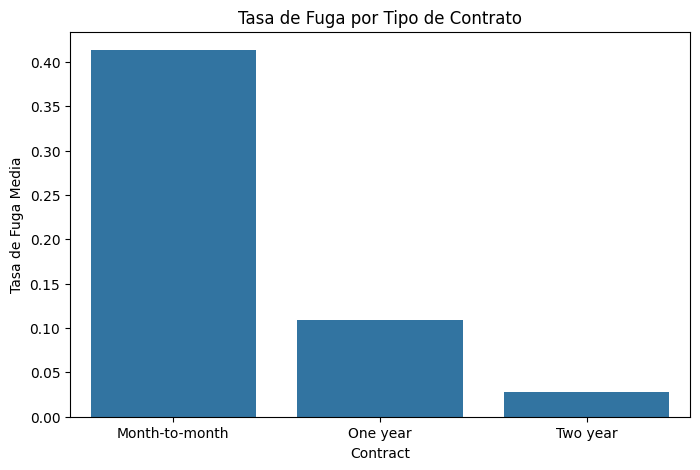

In [65]:
#la visualización. Matplotlib y Seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras de la tasa de fuga por tipo de contrato
if 'Contract' in df_nuevo.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Contract', y='Churn', data=df_nuevo, estimator=np.mean, errorbar=None, order=churn_by_contract.index)
    plt.title('Tasa de Fuga por Tipo de Contrato')
    plt.ylabel('Tasa de Fuga Media')
    plt.show()



In [71]:
print(df_procesado[['Charges.Monthly', 'Churn']].isnull().sum())

Charges.Monthly    0
Churn              0
dtype: int64


In [72]:
print(df_procesado[['Charges.Monthly', 'Churn']].head())

   Charges.Monthly  Churn
0             65.6      0
1             59.9      0
2             73.9      1
3             98.0      1
4             83.9      1


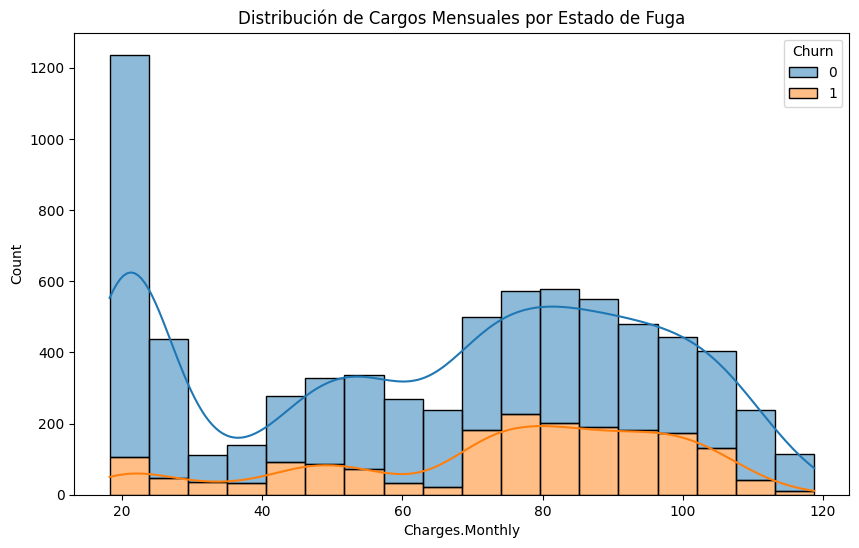

In [75]:
# Histograma de MonthlyCharges para clientes que hicieron churn vs los que no
if 'Charges.Monthly' in df_procesado.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_procesado, x='Charges.Monthly', hue='Churn', multiple='stack', kde=True)
    plt.title('Distribución de Cargos Mensuales por Estado de Fuga')
    plt.show()